In [16]:
#bioinformatique : Analyse du gène fimH chez E. coli

#objectif
#Récupérer 20 séquences du gène fimH chez E. coli depuis la base de données NCBI, 
# les aligner avec MUSCLE, et explorer les variations (mutations, sous-groupes éventuels).

In [17]:
#librairies

from Bio import Entrez, SeqIO
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [19]:
#première étape : trouver et sauver les fichiers fasta
# email requis par NCBI pour l'accès aux serveurs
Entrez.email = "votremail@exemple.com"

def fetch_fimH_protein_sequences(max_items=20, output_dir="data/raw_sequences"):
    os.makedirs(output_dir, exist_ok=True)
    term = "fimH[Gene Name] AND Escherichia coli[Organism]"
    handle = Entrez.esearch(db="protein", term=term, retmax=max_items)
    ids = Entrez.read(handle)["IdList"]
    print(f"[+] {len(ids)} protéines FimH trouvées.")

    paths = []
    for idx, prot_id in enumerate(ids):
        try:
            fetch = Entrez.efetch(db="protein", id=prot_id, rettype="fasta", retmode="text")
            record = SeqIO.read(fetch, "fasta")
            if len(record.seq) > 100:
                filename = os.path.join(output_dir, f"fimH_prot_{idx+1}.fasta")
                SeqIO.write(record, filename, "fasta")
                paths.append(filename)
                print(f"[✓] Sauvé : {filename}")
        except Exception as e:
            print(f"[!] Erreur prot_id {prot_id} : {e}")
    print(f"[✓] {len(paths)} séquences FASTA récupérées.")
    return paths

In [20]:
fasta_paths = fetch_fimH_protein_sequences()
print(f"✅ {len(fasta_paths)} fichiers FASTA générés.")

[+] 20 protéines FimH trouvées.
[✓] Sauvé : data/raw_sequences\fimH_prot_1.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_2.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_3.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_4.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_5.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_6.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_7.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_8.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_9.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_10.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_11.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_12.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_13.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_14.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_15.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_16.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_17.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_18.fasta
[✓] Sauvé : data/raw_sequences\fimH_prot_19.fasta
[✓] Sauvé : data/raw_sequen

In [21]:
#deuxième étape : fusionner les fichers fasta en 1 seul

def merge_fastas(input_dir, output_file="data/fimH_merged.fasta"):
    with open(output_file, "w") as outfile:
        for filename in sorted(os.listdir(input_dir)):
            if filename.endswith(".fasta"):
                records = SeqIO.parse(os.path.join(input_dir, filename), "fasta")
                SeqIO.write(records, outfile, "fasta")
    print(f"[✓] Fusion terminé : {output_file}")
    return output_file

merged_fasta = merge_fastas("data/raw_sequences")

[✓] Fusion terminé : data/fimH_merged.fasta


In [23]:
#alignement MUSCLE

import subprocess

def align_with_muscle_subprocess(input_fasta, output_fasta="data/fimH_aligned.fasta"):
    muscle_path = r"C:\Program Files\muscle\muscle.exe"  # ← chemin complet
    cmd = [muscle_path, "-align", input_fasta, "-output", output_fasta]
    
    try:
        subprocess.run(cmd, check=True)
        print(f"[✓] Alignement MUSCLE terminé : {output_fasta}")
    except subprocess.CalledProcessError as e:
        print("[✗] Erreur lors de l'exécution de MUSCLE :", e)

    return output_fasta

# Appel
aligned_fasta = align_with_muscle_subprocess("data/fimH_merged.fasta")

[✓] Alignement MUSCLE terminé : data/fimH_aligned.fasta


In [25]:
#afficher l'alignement

from Bio import AlignIO

def afficher_alignement(path_fasta, nb_seqs=5):
    alignment = AlignIO.read(path_fasta, "fasta")
    print(f"[i] Alignement : {len(alignment)} séquences, longueur : {alignment.get_alignment_length()}")
    
    for record in alignment[:nb_seqs]:
        print(f">{record.id}\n{record.seq}\n")

afficher_alignement("data/fimH_aligned.fasta")

[i] Alignement : 20 séquences, longueur : 372
>XUQ68459.1
MKRVITLFAVLLMGWSVNAWSFACKTANGTAIPIGGGSANVYVNLAPVVNVGQN-------------------LVVDLSTQIFCHND-YPETITDYVTLQRGSAYGGVLSNFSGTV--KYSG------------------------------SSYPFPTTSETPRVVYNSRTDKPWPVALYLTPVSSAGGVAIKAGSLIAVLILRQTNNYNSDDFQFVWNIYANNDVVVPTGGCDVSARD-------------VTVTLPD-YPGSVPIPLTVY-CAKSQNLGYYLSGTTADAGNSIFTNTASFSPAQGVGVQL-TRNGTIIPANNTVSL---GAVGTSAVSLGLTAN-YARTGGQVTAGNVQSIIGVTFVYQ

>XUQ60143.1
MKRVITLFAVLLMGWSVNAWSFACKTANGTAIPIGGGSANVYVNLAPVVNVGQN-------------------LVVDLSTQIFCHND-YPETITDYVTLQRGSAYGGVLSNFSGTV--KYSG------------------------------SSYPFPTTSETPRVVYNSRTDKPWPVALYLTPVSSAGGVAIKAGSLIAVLILRQTNNYNSDDFQFVWNIYANNDVVVPTGGCDVSARD-------------VTVTLPD-YPGSVPIPLTVY-CAKSQNLGYYLSGTTADAGNSIFTNTASFSPAQGVGVQL-TRNGTIIPANNTVSL---GAVGTSAVSLGLTAN-YARTGGQVTAGNVQSIIGVTFVYQ

>XUQ51816.1
MKRVITLFAVLLMGWSVNAWSFACKTANGTAIPIGGGSANVYVNLAPVVNVGQN-------------------LVVDLSTQIFCHND-YPETITDYVTLQRGSAYGGVLSNFSGTV--KYSG------------------------------SSYPFPTTSETPRVVYNS

In [26]:
#troisième étape : construction d'un arbre phylogénétique

from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

def build_tree_from_alignment(aligned_fasta):
    alignment = AlignIO.read(aligned_fasta, "fasta")
    calculator = DistanceCalculator("blosum62")
    dm = calculator.get_distance(alignment)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm)
    print("[✓] Arbre phylogénétique construit (méthode UPGMA).")
    return tree, dm

tree, distance_matrix = build_tree_from_alignment(aligned_fasta)

[✓] Arbre phylogénétique construit (méthode UPGMA).


[✓] La matrice ne contient que des valeurs finies.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


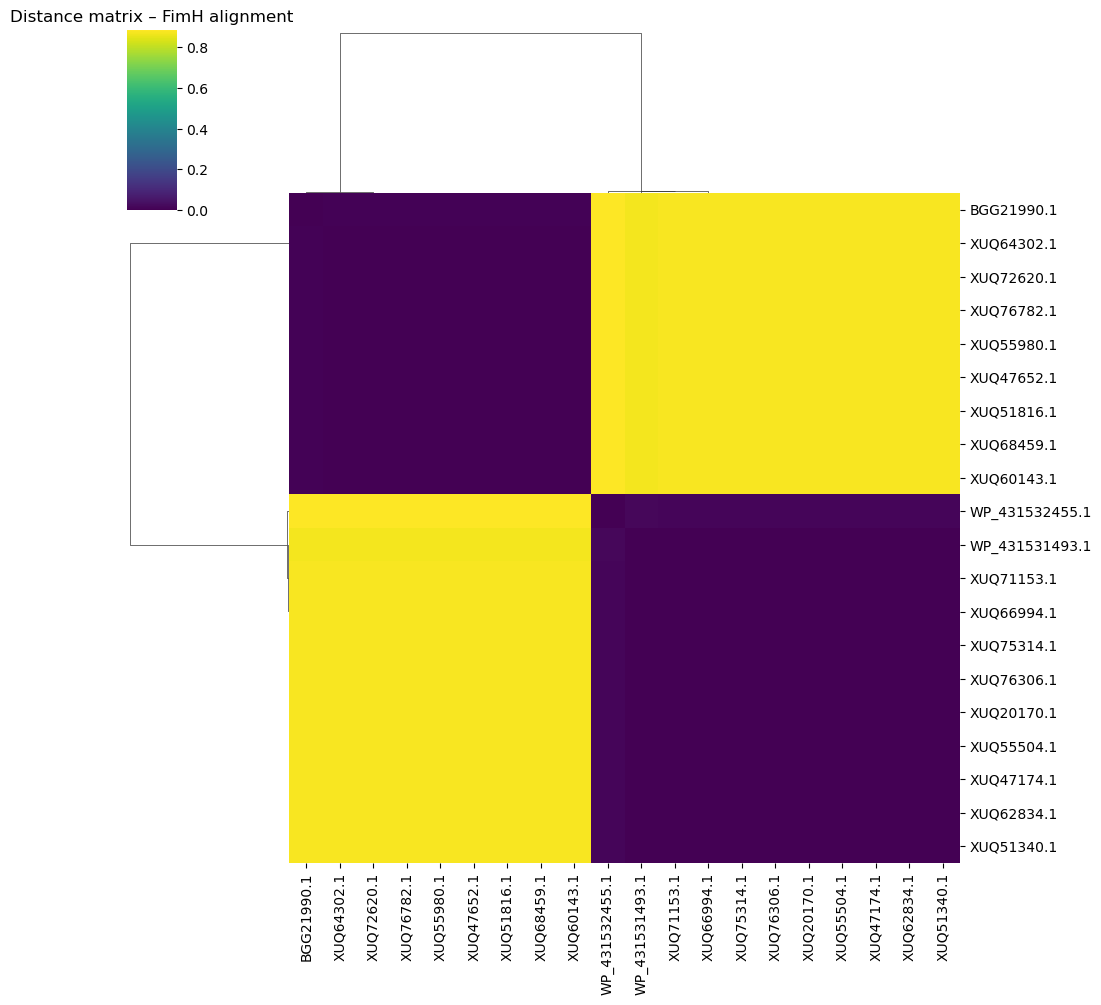

In [29]:
def plot_heatmap_from_dm(dm):
    # Créer une DataFrame carrée à partir de la DistanceMatrix
    names = dm.names
    size = len(names)
    matrix = np.zeros((size, size))

    # Remplir la matrice symétrique
    for i in range(size):
        for j in range(size):
            matrix[i, j] = dm[i, j]

    # Vérification des valeurs finies
    if not np.isfinite(matrix).all():
        print("[!] Il y a des valeurs non finies dans la matrice !")
        return
    else:
        print("[✓] La matrice ne contient que des valeurs finies.")

    # Création de la DataFrame
    df = pd.DataFrame(matrix, index=names, columns=names)

    # Affichage de la heatmap avec clustering
    sns.clustermap(df, cmap="viridis", figsize=(10, 10), metric="euclidean", method="average")
    plt.title("Distance matrix – FimH alignment")
    plt.show()
    
    
plot_heatmap_from_dm(distance_matrix)

In [ ]:
#Les protéines FimH analysées se regroupent en deux grands clusters bien distincts, 
# ce qui pourrait refléter deux clades évolutifs, 
# ou des origines bactériennes différentes (ex. pathogènes uropathogènes vs intestinaux commensaux ?).

In [33]:
type(distance_matrix)

Bio.Phylo.TreeConstruction.DistanceMatrix

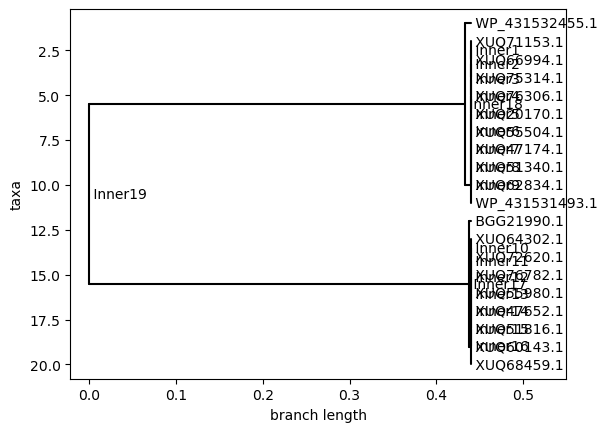

In [34]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Phylo

# On suppose que tu as déjà ta distance_matrix de type DistanceMatrix
constructor = DistanceTreeConstructor()

# Tu peux choisir 'nj' (Neighbor Joining) ou 'upgma' (clustering hiérarchique moyen)
tree = constructor.upgma(distance_matrix)

# Affichage de l’arbre
Phylo.draw(tree)

# Facultatif : affichage en ASCII dans la console
# Phylo.draw_ascii(tree)

# Facultatif : export au format Newick
# Phylo.write(tree, "arbre_fimh.nwk", "newick")

In [ ]:
#essayons de faire mieux... par exemple, obtenir les longueurs des branches.

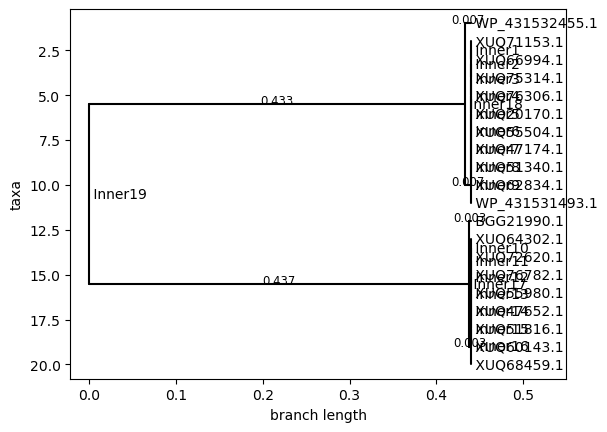

In [35]:
Phylo.draw(tree, branch_labels=lambda c: round(c.branch_length, 3))

In [ ]:
#deux grands groupes distincts (clades), séparés par une branche longue (branch length > 0.4), 
# ce qui signifie une divergence importante entre ces deux ensembles de séquences FimH.